In [ ]:
"""
날짜 : 2021/02/09
이름 : 김은표
내용 : 딥러닝 RNN 실습하기
"""

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
tf.__version__

'2.4.1'

In [ ]:
#시계열 데이터 만들기
time = np.arange(365)
month_time = (time % 30) / 30

time_series = 10 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(365))

#time_series 데이터 시각화
plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])


In [ ]:
#RNN 학습을 위한 데이터 전처리
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):

    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break

  return np.array(train_data), np.array(train_label)

n = 10
train_data, train_label = make_sequence(time_series, n)

train_data = train_data.reshape(-1, n, 1) # -1 은 자동을 의미, 자동 x 10 x 1 구조로 변환
train_label = train_label.reshape(-1, 1)

print(train_data.shape)

#학습 데이터
_train_data  = train_data[:300]
_train_label = train_label[:300]

#테스트 데이터
_test_data  = train_data[300:]
_test_label = train_label[300:]

(355, 10, 1)


In [ ]:
#모델 설계하기
model = Sequential()

model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))

In [ ]:
#모델 설정하기
model.compile(optimizer='Adam', loss='mse', metrics=['acc'])

In [ ]:
#모델 학습하기
model.fit(_train_data, _train_label, epochs=100)

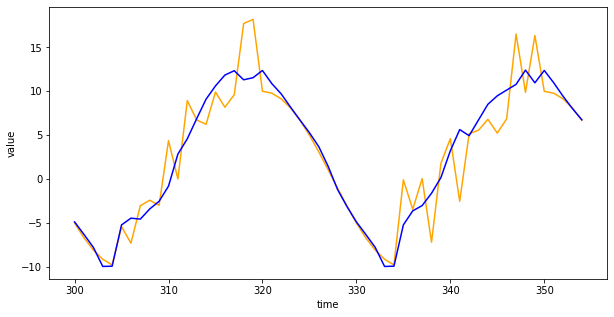

In [ ]:
#모델 평가하기
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label) + len(result))

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='orange', label='label')
plt.plot(result_range, result, color='blue', label='result')
plt.show()